# Contract Data Analysis
Author: Carson Case [carsonpcase@gmail.com]  
This notebook is to used for analysing contract NAICS codes to find the best NAICS opportunities among contract data on sam.gov  

Download the data here:  
https://sam.gov/data-services/Contract%20Opportunities/Archived%20Data?privacy=Public

In [1]:
# Import the data as csv. NOTE data is renamed
import pandas as pd

df1 = pd.read_csv("2024data.csv",  encoding = "ISO-8859-1")
df2 = pd.read_csv("2023data.csv",  encoding = "ISO-8859-1")
df = pd.concat([df1,df2])

/tmp/ipykernel_3844/3144670377.py:4: DtypeWarning: Columns (27,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("2024data.csv",  encoding = "ISO-8859-1")
/tmp/ipykernel_3844/3144670377.py:5: DtypeWarning: Columns (27,34,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("2023data.csv",  encoding = "ISO-8859-1")


In [2]:
# Filter out Small Business Set Aside contracts only
dfsba = df[df['SetASideCode'] == 'SBA']

In [3]:
"""
Function for returning the following data per NAICS code:
@returns
    - Score: Percent of solicitations awarded out of solicitations listed
    - Count: Number of awarded solicitations
    - Awarded$: Total $s awarded
"""
def get_data_for_NAICS(naics_code):
    all_solicitations = len(dfsba[(dfsba['Type'] == 'Solicitation') & (dfsba['NaicsCode'] == naics_code)].index)
    awarded_solicitations = len(dfsba[(dfsba['Type'] == 'Award Notice') & (dfsba['BaseType'] == 'Solicitation') & (dfsba['NaicsCode'] == naics_code)].index)
    score = 0
    if(all_solicitations) != 0:
        score = awarded_solicitations/all_solicitations
    data = {
        'score': score,
        'count': awarded_solicitations,
        'awarded$': dfsba[(dfsba['Type'] == 'Award Notice') & (dfsba['BaseType'] == 'Solicitation') & (dfsba['NaicsCode'] == naics_code)]['Award$'].astype(float).sum()
    }
    return(data)

In [4]:
# get the data in a dataframe for each NAICS code
all_codes = dfsba['NaicsCode'].unique()

awardsdf = pd.DataFrame({'naics': [], 'score': [], 'countAwarded': [], 'dollarsAwarded':[]})
award_rate_by_codes = {}

for code in all_codes:
    data = get_data_for_NAICS(code)
    awardsdf = pd.concat([awardsdf, pd.DataFrame({'naics': [code], 'score': [data['score']], 'countAwarded': [data['count']], 'dollarsAwarded':[data['awarded$']]})])

In [5]:
# Print out the dataframe according to some sorting
awardsdf = awardsdf[awardsdf['score'] > 0]

awardsdf[awardsdf['countAwarded'] > 10].sort_values(by='score')

,naics,score,countAwarded,dollarsAwarded
0,332722.0,0.060377,16.0,6.682670e+05
0,561621.0,0.061224,21.0,6.041716e+06
0,332710.0,0.062147,11.0,2.218835e+07
0,813110.0,0.075472,12.0,2.741149e+06
0,335931.0,0.075862,11.0,3.292925e+06
...,...,...,...,...
0,311991.0,0.403974,61.0,7.532126e+08
0,311999.0,0.475556,107.0,2.597307e+08
0,721211.0,0.573333,43.0,1.470716e+06
0,325413.0,1.500000,54.0,9.097077e+06


# Plotting
The hypothesis here is that low score contracts will have less competition as a larger amount of bids go unfulfilled. And a large volume of contracts awarded means that there is ample room for new competetors in the NAICS niche

<Axes: title={'center': 'Award Count / Score'}, xlabel='score', ylabel='countAwarded'>

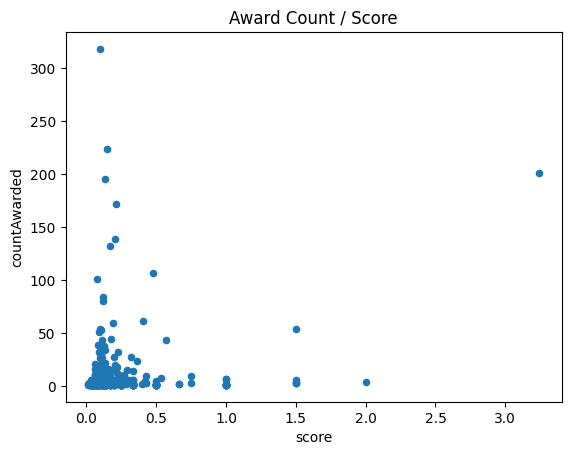

In [34]:
import matplotlib
import naics

def getNAICSCodes(filteredDf):
    codes = list(filteredDf['naics'])
    i = 0
    for code in codes:
        i = i + 1
        print(str(i),". ",naics.industry(int(code)))

awardsdf.plot.scatter(x='score', y='countAwarded', title='Award Count / Score')

In [35]:
# Get that NAICS
getNAICSCodes(awardsdf[awardsdf['countAwarded'] > 200])

1 .  Commercial and Institutional Building Construction
2 .  Highway, Street, and Bridge Construction
3 .  Pharmaceutical Preparation Manufacturing


<Axes: title={'center': 'Awarded $s / Score'}, xlabel='score', ylabel='dollarsAwarded'>

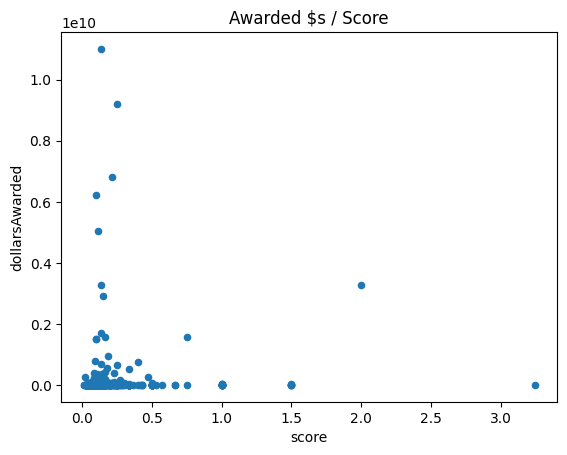

In [36]:
awardsdf.plot.scatter(x='score', y='dollarsAwarded', title='Awarded $s / Score')

In [37]:
# Get that NAICS
getNAICSCodes(awardsdf[awardsdf['dollarsAwarded'] > 1e10])

1 .  Research and Development in the Physical, Engineering, and Life Sciences (except Nanotechnology and Biotechnology)
